In [3]:
import numpy as np, pandas as pd, seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df = pd.read_csv("Iris.csv")

## Dataset description

In [5]:
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [6]:
df.drop(columns="Id", inplace=True)

In [7]:
df.shape

(150, 5)

In [8]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Comparision between the categories of Species and the input columns

In [10]:
l=['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
for i in l:
    input_mean = df.groupby("Species")[[i]].mean().reset_index()
    px.bar(input_mean, x="Species", y=i, color="Species", title=f"Comparision between the {i} and Species columns").show()

## Handling missing values

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Handling duplicate values

In [12]:
df.duplicated().sum()

3

In [13]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Handling outliers

In [15]:
l=['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
for i in l:
    px.box(df, x=df[i],title= i).show()

## Function for removal of outliers

In [16]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1 # IOR - Inter Quartile Range
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [17]:
l,u=rem_out(df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']>u,u,df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']<l,l,df['SepalWidthCm'])

## Features after removal of outliers

In [18]:
l=['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
for i in l:
    px.box(df, x=df[i],title= i).show()

## Separating target variable and the rest of the features for training and testing purposes

In [19]:
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
X = df[feature]
y = df['Species']

## Correlation among the columns

In [20]:
# px.(df, color="Species", title="Matrix relationship between all the columns").show()
pd.DataFrame.iteritems = pd.DataFrame.items
px.scatter_matrix(df, dimensions=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], color="Species", height=900).show()

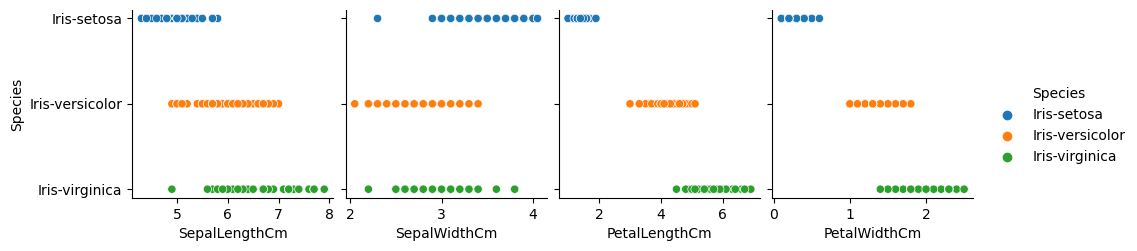

In [21]:
sns.pairplot(data=df, y_vars='Species', hue='Species')

In [22]:
df.groupby(by='Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.010417,3.419792,1.462500,0.250000
Iris-versicolor,5.936000,2.771000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


## Train and test model split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

## Logistic Regression

In [25]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

## KNN

In [26]:
model_2 = KNeighborsClassifier(n_neighbors=8)
model_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

## SVC

In [27]:
model_3 = SVC()
model_3.fit(x_train,y_train)

SVC()

## Decision Tree 

In [28]:
model_4 = DecisionTreeClassifier(random_state=1,max_depth=5)
model_4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [29]:

names = [
    "Logistic Regression",
    "KNN",
    "SVC",
    "Decision Tree"
]

models = [
    model_1,model_2,model_3,model_4
]

In [30]:
def score(X_train, y_train, X_test, y_test, names = names, models = models):
    score_df, score_train, score_test = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))
    
    score_df["Model"], score_df["Training accuracy"], score_df["Testing accuracy"] = names, score_train, score_test
    return score_df

In [31]:
score(x_train, y_train, x_test, y_test, names = names, models = models)

,Model,Training accuracy,Testing accuracy
0,Logistic Regression,0.970588,0.955556
1,KNN,0.960784,0.955556
2,SVC,0.970588,0.955556
3,Decision Tree,1.000000,0.933333


## Classification report of all the models

In [32]:
for i in models:
    predictions = i.predict(x_test)
    print(i,"\n")
    print(classification_report(y_test,predictions))
    print("\n")

LogisticRegression() 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



KNeighborsClassifier(n_neighbors=8) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



SVC() 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-ver

## Visual representation of the accuracy of all the models

In [33]:
score_res_train, score_res_test = [], []
for i in models:
    predictions_train = i.predict(x_train)
    score_res_train.append(accuracy_score(predictions_train,y_train))
    predictions_test = i.predict(x_test)
    score_res_test.append(accuracy_score(predictions_test,y_test))
res = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Decision Tree'],
    'Training Accuracy Score':[score_res_train[0]*100, score_res_train[1]*100, score_res_train[2]*100, score_res_train[3]*100],
    'Testing Accuracy Score':[score_res_test[0]*100, score_res_test[1]*100, score_res_test[2]*100, score_res_test[3]*100]})
# res=res.sort_values('Testing Accuracy Score')
px.line(data_frame=res, x='Model', y=["Training Accuracy Score", "Testing Accuracy Score"], title='Model Accuracy Scores (in %)', color_discrete_sequence=["royalblue","black"], markers=True, labels={"Training Accuracy Score": "Training Accuracy Score (in %)", "Testing Accuracy Score": "Testing Accuracy Score (in %)"}).show()

## Checking the model's output on user input

In [34]:
sl = float(input("enter the values of 'sepal length': "))
sw = float(input("enter the values of 'sepal width': "))
pl = float(input("enter the values of 'petal length': "))
pw = float(input("enter the values of 'petal width': "))
inp = np.array([[sl,sw,pl,pw]])
pred_1 = model_1.predict(inp)
print("\nModel's Predictions: ")
print("\nLogistic Regression Prediction: ",pred_1)
pred_2 = model_2.predict(inp)
print("KNN Prediction: ",pred_2)
pred_3 = model_3.predict(inp)
print("SVC Prediction: ",pred_3)
pred_4 = model_4.predict(inp)
print("Decsion Tree Prediction: ",pred_4)


Model's Predictions: 

Logistic Regression Prediction:  ['Iris-virginica']
KNN Prediction:  ['Iris-virginica']
SVC Prediction:  ['Iris-virginica']
Decsion Tree Prediction:  ['Iris-versicolor']


In [35]:
import joblib as jb
jb.dump(model_1,"LR.sav")
jb.dump(model_2,"KNN.sav")
jb.dump(model_3,"SVC.sav")
jb.dump(model_4,"DT.sav")

['DT.sav']